**<font color='red'>Report Submission Information (must be completed before submitting report!)</font>**

* Student 1 Full Name and Number : 
* Student 2 Full Name and Number : 
* Workshop day : e.g., Wednesday
* Workshop time : e.g., 12pm 

# <font color='blue'> Workshop 1 – Optimisation [2 weeks] </font>

## Objectives:

* Learn how to formulate optimisation problems in practice.
* Familiarise yourself with practical software tools used for optimisation.
* Solve optimisation problems using Python Scipy and Matlab.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
Another name for the field of “Optimisation” is “Mathematical Optimisation.” As the name indicates optimisation is an area of applied mathematics. It is possible to study optimisation entirely from a mathematical perspective. However, engineers are interested in solving real-world problems in a principled way. Many engineering problems can be and are formulated as optimisation problems. In those cases, mathematical optimisation provides a solid theoretical foundation for solving them in a principled way.

In this workshop, you will learn how to formulate and solve optimisation problems in practice. This will give you a chance to connect theoretical knowledge and practical usage by doing it yourself. You will familiarise yourself with practical optimisation tools for Python. These are chosen completely for educational reasons (simplicity, accessibility, cost). While the underlying mathematics is timeless, optimisation software evolves with time, and can be diverse. Fortunately, once you learn one or two, it should be rather easy to learn others now and in the future, because software designers often try to make it user friendly and take into account what people already know. 

> In the future, you should consider and learn serious optimisation software for scalability and reliability. They can be complex and/or expensive but they get the job done for serious engineering. Teaching such software takes too much time and is beyond the scope of this subject.

## Workshop Preparation: [before you arrive to the lab]

You can come to the workshops as you are or you can prepare beforehand to learn much more! 
We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and coming prepared to the workshop is one of the best ways to gain more knowledge! For example, there are a few questions in each workshop which you can answer beforehand.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on optimisation.
3. Read/check relevant reading material and links from LMS/Resources-Reading
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_


## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__

# Section 1: Convex Functions

Remember the definition of convex and concave functions from lecture slides. Functions are mathematical objects but they are used in engineering in very practical ways, for example, to represent the relationship between two quantities. Let's draw a function!

<IPython.core.display.Javascript object>


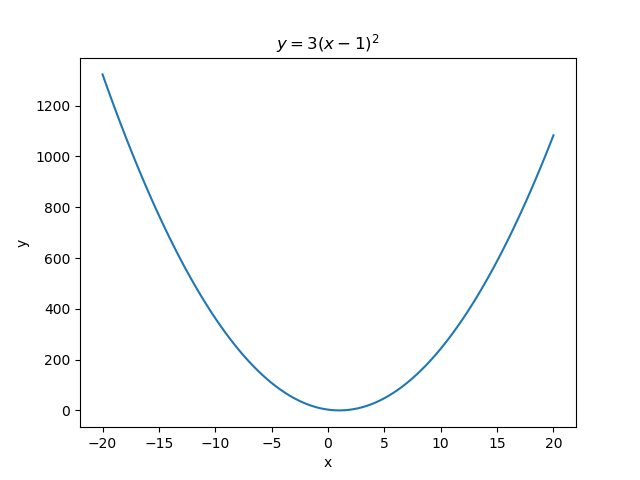

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# define function f(x)
def f(x):
    return 3*(x-1)**2

# define x and y
x = np.linspace(-20, 20, 100) # 100 equally spaced points on interval [-20,20]
y = f(x) # call function f(x) and set y to the function's return value

# Plot the function y=f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y=3(x-1)^2$')
plt.show()

### Question 1.1. (1 pt)
Plot one concave and one nonconvex functions of your choosing (preferably in 3D). Provide their formulas below.

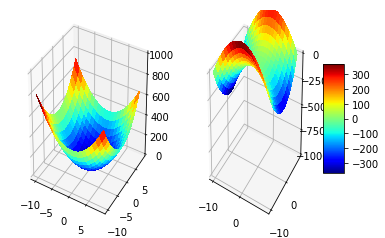

In [11]:
''' Answer as code here '''
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
# Plot convex figure
ax = fig.add_subplot(1, 2, 1, projection='3d')
X=np.arange(-10,10,1)
Y=np.arange(-10,10,1)
X, Y = np.meshgrid(X, Y)
Z = (2*X)**2 +(2*Y)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap=cm.jet,linewidth=0.01, antialiased=False)
ax.set_zlim3d(0,1000)

# Plot non-convex figure
ax = fig.add_subplot(1, 2, 2, projection='3d')
X=np.arange(-10,10,1)
Y=np.arange(-10,10,1)
X, Y = np.meshgrid(X, Y)
Z = -(2*X)**2 +(2*Y)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap=cm.jet,linewidth=0.01, antialiased=False)
ax.set_zlim3d(-1000,0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


**Answer as text here**

Convex Formula:

$$ z = 2x^2 + 2y^2$$

Non-convex Formula:

$$ z = -2x^2 + 2y^2$$

### Question 1.2. (1 pts)
How would you determine whether a single or multi-variate continuously differentiable function is convex or not? 
> Note that the question becomes very tricky if you have a **parametric** multivariate polynomials of degree four or higher! 

> *[Optional]* An interesting paper (for those who wish to go deeper) http://web.mit.edu/~a_a_a/Public/Publications/convexity_nphard.pdf 

**Answer as text here**

Single continously differential function is convex if and only if:
\begin{equation}
\frac{\partial^2 f}{\partial^2 f} \geq 0 \\
\frac{\partial^2 f}{\partial^2 f} > 0 \Rightarrow strictly \ convex (slope \ increasing)
\end{equation}

Multi-variate continously differential function is convex if and only if eigin values of Hessian matrix is positive:
$$\triangledown^2 f(x) = H = Hessian \ matrix $$


### Question 1.3. (2 pts)
Why are convex optimisation problems considered to be easy to solve? Consider optimality conditions of unconstrained functions in your answer. Plot first and second order derivative functions of the concave and non-convex functions you have chosen above (as part of Question 1.1) to further support your argument.

**Answer as text here**

Convex optimisation problem are easier to solve because of existance of global maximum or minimum.

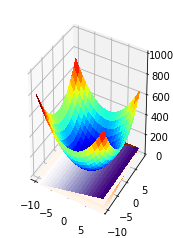

In [21]:
''' Answer as code here '''
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = Symbol('x')
y = Symbol('y')
z = (2*x )**2 +(2*y)**2
dzdx = z.diff(x)
dzdy = z.diff(y)
div_z = [dzdx, dzdy]
dzdxx = dzdx.diff(x)
dzdxy = dzdx.diff(y)
dzdyx = dzdy.diff(x)
dzdyy = dzdy.diff(y)
div2_z = [[dzdxx, dzdxy],[dzdyx, dzdyy]]

fig_2 = plt.figure()
ax_1 = fig_2.add_subplot(1,2,1, projection='3d')
X=np.arange(-10,10,1)
Y=np.arange(-10,10,1)
X,Y = np.meshgrid(X,Y)
# Z = div_z[0]+div_z[1]
Z = (2*X)**2 +(2*Y)**2
surf = ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,linewidth=0.01, antialiased=False)
Z = 8*X
surf = ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.Purples,linewidth=0.01, antialiased=False)
Z = 8*Y
surf = ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.Oranges,linewidth=0.01, antialiased=False)
Z = 8+0*X*Y
surf = ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.Oranges,linewidth=0.01, antialiased=False)

ax_1.set_zlim3d(0,1000)
plt.show()

ax_2 = fig_2.add_subplot(122, aspect='auto')
X=np.arange(-10,10,1)
Y=np.arange(-10,10,1)
X, Y = np.meshgrid(X, Y)
Z = -(2*X)**2 -div_z[1]
#surf = ax_2.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.jet,linewidth=0.01, antialiased=False)
ax.set_zlim3d(-1000,0)
fig.colorbar(surf, shrink=0.5, aspect=5)


# Section 2: Unconstrained Optimisation

## 2.1 _Example_. Aloha communication protocol

![Wireless Network](img/wireless.jpg)

**Aloha** is a well-known random access or _MAC_ (Media/multiple Access Control) communication protocol. It enables multiple nodes sharing a broadcast channel without any additional signaling in a distributed manner. Unlike _FDMA_ or _TDMA_ (frequency or time-division multiple access), the channel is not divided into segments beforehand and collisions of packets due to simultaneous transmissions by nodes are allowed. In slotted Aloha, the nodes can only transmit at the beginning of time slots, which are kept by a global/shared clock. See [Aloha](https://en.wikipedia.org/wiki/ALOHAnet#Slotted_ALOHA) for further background information.

### Slotted Aloha Efficiency

For an $N$-node slotted Aloha system, where each node transmits with a probability $p$, the throughput of the system is given by
$$ S(p) = N p (1-p)^{N-1}$$

### Question 2.1. (2 pts)
Formally define the optimisation problem to find the optimal probability $p$ that maximises the throughput. Clearly identify the objective and decision variable(s). Is the objective convex or concave? Show through derivation. 

Note that, there is the constraint $0 \leq p \leq 1$ on probability $p$ but we will ignore it for now.

**Answer as text here** 

Optimization problem:
$$ \max_p S(p) = Np(1-P)^{N-1}$$ where $S(p)$ is objective and $p$ is decision variable.

Concave or Convex:
\begin{equation}
\begin{split}
S^{'}(p) &= \frac{\partial}{\partial p}Np(1 - p)^{N - 1} \\
&= N(1-p)^{N-1} + Np(N-1)(1-p)^{N-2}(-1) \\
&= N(1-p)^{N-2}(1-p - p(N-1)) \\
&= N(1-p)^{N-2}(1-p - pN + p)) \\
&= N(1-p)^{N-2}(1-pN)
\end{split}
\end{equation}

\begin{equation}
\begin{split}
S^{''}(p) &= \frac{\partial}{\partial p}S^{'}(p) \\
&= N(N-2)(1-p)^{N-3}(-1)(1-pN)+ N(1-p)^{N-2}(-N) \\
&= -N(1-p)^{N-3}((N-2)(1-pN) + N(1-p)) \\
&= -N(1-p)^{N-3}(N-pN^2-2+2pN+N-pN) \\
&= -N(1-p)^{N-3}(2N-pN^2-2+pN) \\
&= N(1-p)^{N-3}(p(N^2-N)+2-2N) \\
&\Rightarrow \ convex \ or \ concave \ depends \ on \ vlaue \ of \ p \ and \ N
\end{split}
\end{equation}


### Question 2.2. (2 pts)
Plot the performance function and its derivative for $N=10$ nodes. Is the objective function convex or concave? Determine using mathematical methods. Investigate the property of the derivative function of the objective. What do you call such functions?

**Answer as text here**

Concave or Convex with $N=10$:
\begin{equation}
\begin{split}
S^{''}(p) &= N(1-p)^{N-3}(p(N^2-N)+2-2N) \\
&= 10(1-p)^{7}(90p-18)
\end{split}
\end{equation}
$\Rightarrow$ the function is quasi-convex since it depends on $p$ for above value to be positive or negative.


In [4]:
''' Answer as code here '''

' Answer as code here '

### Question 2.3. (2 pts)
Find the optimal probability $p$ for $N=10$ nodes. Use an appropriate package from [Scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html). Cross-check your answer with a mathematical formula that you should derive by hand. 


In [5]:
from scipy import optimize
''' Answer as code here '''

' Answer as code here '

**Answer as text here**

## 2.2 Gradient Descent Algorithms

### Question 2.4. (10 pts)
Write your own gradient algorithm (with constant step size) to solve the problem
$$ \min_x x^T Q x + r^T x,$$
where $x,\, r \in \mathbb{R}^2$ and $Q$ is a $2\times 2$ positive definite matrix of your choice. Cross-check your answers using one of the standard optimisation packages, e.g. scipy or cvxpy.

1. If Q is positive definite, then what type of optimisation problem is this? Give your answer using mathematical tools learned in classroom. Would anything change if $Q$ were not positive definite? Plot both cases and comment. 
2. Focusing on positive definite $Q$, what happens if you choose your fixed step size too large or too small? Observe and comment.
3. Choose $Q$ in such a way that is has a low [condition number] (https://www.encyclopediaofmath.org/index.php/Condition_number), [see also.](https://calculus.subwiki.org/wiki/Gradient_descent_with_constant_learning_rate_for_a_quadratic_function_of_multiple_variables) Next, choose a $Q$ with a high condition number. Compare the performance of your algorithm in both cases, and comment.  
4. Now, solve both versions of the problem using (b) diminishing step size (c) Armijo rule/wolf test (line search). Discuss stopping criteria for all variants. 
5. Plot your trajectories clearly showing the iterations of the gradient algorithm. You should also show either by displaying the level sets of the objective or the objective function itself (if resorting to a 3D plot). 

**Answer as text here**
**Solution** at: https://en.wikipedia.org/wiki/Gradient_descent

Question: 2.4.1

Since $Q$ is positive definite, then $$x^TQx>0 \Rightarrow convex \ optimization$$ if $Q$ is not positive difinite then the problem is not convex optimization.

Question: 2.4.2,

If the fixed step size $\alpha$ is too small, it will take long time to converge and if the $\alpha$ is too big, we may miss the mimum point.


In [6]:
''' Answer as code here '''

' Answer as code here '

###  Question 2.5. (2 pts)
Choose one of the versions of the problem and algorithms in **Question 2.4** that finds the correct solution.

1. Use objective function itself or a norm of its gradient as a descent (Lyapunov) function that establishes the convergence of the solution algorithm $A(x)$. Plot the value of the chosen descent function versus the trajectory or steps.
2. Calculate and plot $||x(n)-x^*||$ over iterations $n=0,\ldots$, to establish that your solution algorithm leads to a pseudo-contraction.


**Answer as text here**

In [7]:
''' Answer as code here '''

' Answer as code here '

# Section 3: Constrained Optimisation

## 3.1 _Example_. Waterfilling in Communications

_by Robert Gowers, Roger Hill, Sami Al-Izzi, Timothy Pollington and Keith Briggs.
From the book by Boyd and Vandenberghe, Convex Optimization, Example 5.2 page 245._

$$\min_{x} \sum_{i=1}^N -\log(\alpha_i + x_i)$$ 

$$\text{subject to } x_i \geq 0, \; \forall i, \text{ and } \sum_{i=1}^N x_i = P $$

This problem arises in information/communication theory, in allocating power to a
set of $n$ communication channels. The variable $x_i$ represents the transmitter power
allocated to the _i-th_ channel, and $\log(\alpha_i + x_i)$ gives the capacity or communication rate of the channel, where $\alpha_i>0$ represents the floor above the baseline at which power can be added to the channel. The problem is to allocate a total power of one to the channels,
in order to maximize the total communication rate.

This can be solved using a classic [water filling algorithm](https://en.wikipedia.org/wiki/Water_filling_algorithm). 

![Waterfilling](img/waterfill.jpg)


###  Question 3.1. (4 pts)

1. (1 pt) Is the problem in Example 3.1 convex? Formally explain/argue why or why not. What does this imply regarding the solution? 
2. (2 pts) Solve the problem above for $N=8$ and a randomly chosen $\alpha$ vector. You can use for example _Cvxpy_ package. Cross-check your answer with another software (package), e.g. Matlab or Scipy. 
3. (1 pt) Write the Lagrangian, KKT conditions, and find numerically the Lagrange multipliers associated with the solution (using the software package/function). Which constraints are active? Explain and discuss briefly. 

**Answer as text here**

**Solution** at https://www.cvxpy.org/examples/applications/water_filling_BVex5.2.html 

Question 3.1.1

Convex Optimization:
\begin{equation}
\begin{split}
f(x_i) &= \sum_{i=1}^N - \log(\alpha_i + x_i) \\
\Rightarrow f^{'}(x_i) &= \frac{\partial}{\partial x_i} \sum_{i=1}^N - \log(\alpha_i + x_i) 
= -\sum_{i=1}^N \frac{1}{(\alpha_i + x_i)ln(10)} 
= -\sum_{i=1}^N \frac{(\alpha_i + x_i)^{-1}}{ln(10)} \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\Rightarrow f^{''}(x_i) = -\sum_{i=1}^N (-1) \frac{(\alpha_i + x_i)^{-2}}{ln(10)} 
= -\sum_{i=1}^N \frac{1}{(\alpha_i + x_i)^2 ln(10)}
\end{split}
\end{equation}
Since both $x_i, \alpha_i > 0$, $\Rightarrow convex \ optimization \ problem$.

Question 3.1.3

Lagrangian condition:
\begin{equation}
\mathcal{L}(x, \lambda, \nu) = f_0 (x) + \sum_{i=1}^M \lambda_i f_i(x) + \sum_{i=1}^N \nu_i h_i(x) \\
\Rightarrow \mathcal{L}(x, \lambda, \nu) = \sum_{i=1}^N -log(\alpha_i + x_i) - \sum_{i=1}^N \lambda_i x_i + \sum_{i=1}^N \nu_i(x_i - P)
\end{equation}

KKT condition:
\begin{equation}
x^* \geq 0 \\
x^* = P \\
\lambda* \geq 0 \\
\lambda* x_i^* = 0, i=1,2..., N \\
-\frac{1}{(\alpha_i + x_i^*)} - \lambda^* + \nu^* = 0, i=1,2..., N
\end{equation}


In [6]:
''' Answer as code here '''
#!/usr/bin/env python3
# @author: R. Gowers, S. Al-Izzi, T. Pollington, R. Hill & K. Briggs
import numpy as np
import cvxpy as cp

def water_filling(n, a, sum_x=1):
    '''
    Boyd and Vandenberghe, Convex Optimization, example 5.2 page 145
    Water-filling.

    This problem arises in information theory, in allocating power to a set of
    n communication channels in order to maximise the total channel capacity.
    The variable x_i represents the transmitter power allocated to the ith channel,
    and log(α_i+x_i) gives the capacity or maximum communication rate of the channel.
    The objective is to minimise -∑log(α_i+x_i) subject to the constraint ∑x_i = 1
    '''

    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a

    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(cp.log(alpha + x)))

    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - sum_x == 0]

    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan
    
# As an example, we will solve the water filling problem with 3 buckets, each with different α
np.set_printoptions(precision=3)
buckets = 3
alpha = np.array([0.8, 1.0, 1.2])

stat, prob, x = water_filling(buckets, alpha)
print('Problem status: {}'.format(stat))
print('Optimal communication rate = {:.4g} '.format(prob))
print('Transmitter powers:\n{}'.format(x))


TypeError: __init__() got an unexpected keyword argument 'shape'

## 3.2 _Example_. Economic Dispatch in Power Generation

The problem is formulated as
$$ \min_P \sum_{i=1}^N c_i P_i $$
$$\text{subject to } P_{i,max} \geq P_i \geq 0, \; \forall i, \text{ and } \sum_{i=1}^N P_i = P_{demand} $$

Here, $P_1,\ldots P_N$ are the power generated by Generators $1,\ldots,N$, $c_i$ is the per-unit generation cost of the i-_th_ generator, and $P_{demand}$ is the instantaneous power demand that needs to be satisfied by aggregate generation. More complex formulations take into account transmission, generator ramp-up and down constraints, and reactive power among other things.

### Question 3.2. (4 pts)

Let us get inspired from generation in Victoria with $N=12$ biggest generators that have more than 200MW capacity. Choose their maximum generation randomly or from the Victoria generator report if you wish to be more realistic. Generate a random cost vector $c$ varying between $10-50$ AUD per MWh. _(Optionally, you can search and find how much different generation types cost if you are interested)._ Let the demand be $P_{demand}=5000MW$. 

Solve this simplified [economic dispatch](https://en.wikipedia.org/wiki/Economic_dispatch) problem defined above. The resulting [merit order](https://en.wikipedia.org/wiki/Merit_order) is the generation that would have been if there was no NEM (electricity market).

More about electricity market and generation at https://www.aemo.com.au/ See also this [NEM overview introductory document (right click to download)](./files/National_Electricity_Market_Fact_Sheet.pdf) and the [Victoria generator report as of January 2019](files/Generation_Information_VIC_January_2019.xlsx).

1. Solve the problem using _cvxpy._ 
2. What type of an optimisation problem is this? Briefly explain.
3. Formulate by hand the dual problem and solve it with _cvxpy._ Is there a duality gap? Explain briefly why or why not.
4. Briefly comment on simplex algorithm and solve the problem using [Scipy and simplex algorithm.](https://docs.scipy.org/doc/scipy/reference/optimize.linprog-simplex.html) Compare your results.


**Answer as text here**

In [9]:
''' Answer as code here '''

' Answer as code here '

## 3.3 _Example_. Power Control in Wireless Communication

 *Adapted from Boyd, Kim, Vandenberghe, and Hassibi,* "[A Tutorial on Geometric Programming](https://web.stanford.edu/~boyd/papers/pdf/gp_tutorial.pdf)."

The [power control problem in wireless communications](http://winlab.rutgers.edu/~narayan/PAPERS/PC%20for%20Wireless%20Data.pdf) aims to minimise the total transmitter power available across $N$ trasmitters while concurrently achieving good (or a pre-defined minimum) performance. 

The technical setup is as follows. Each transmitter $i$ transmits with a power level $P_i$ bounded below and above by a minimum and maximum level. The power of the signal received from transmitter $j$ at receiver $i$ is $G_{ij} P_{j}$, where $G_{ij} > 0$ represents the path gain (often loss) from transmitter $j$ to receiver $i$. The signal power at the intended receiver $i$ is $G_{ii} P_i$, and the interference power at receiver $i$ from other transmitters is given by $\sum_{k \neq i} G_{ik}P_k$. The (background) noise power at receiver $i$ is $\sigma_i$. Thus, the _Signal to Interference and  Noise Ratio (SINR)_ of the $i$th receiver-transmitter pair is

$$ S_i = \frac{G_{ii}P_i}{\sum_{k \neq i} G_{ik}P_k + \sigma_i }. $$

The minimum SINR represents a performance lower bound for this system, $S^{\text min}$. 

The resulting optimisation problem is formulated as

$$
\begin{array}{ll}
\min_{P} & \sum_{i=1}^N P_i \\
\text{subject to} & P^{min} \leq P_i \leq P^{max}, \; \forall i \\
& \dfrac{G_{ii}P_i}{\sigma_i + \sum_{k \neq i} G_{ik}P_k} \geq S^{min} , \; \forall i \\
\end{array}
$$

### Question 3.3. (10 pts)

Let $N=6$, $P^{min}=0.1$, $P^{max}=5$, $\sigma=0.2$ (same for all). Create a random path loss matrix $G$, where off-diagonal elements are between $0.1$ and $0.9$ and the diagonal elements are equal to $1$. 

1. (2 pts) Write down the Langrangian and KKT conditions of this problem.
2. (2 pts) Solve the problem first with $S^{min}=0$ using _cvxpy_. Plot the power levels and SINRs that you obtain. 
3. (2 pts) What happens if you choose an $S^{min}$ that is larger? Solve the problem again and document your results. What happens if you choose a very large $S^{min}$? Observe and comment. 
4. (4 pts) Solve the problem using a combination of active set and penalty function methods. Specifically, choose a penalty function to impose the $S^{min}$ constraint and use an active set method for $P^{min}$, $P^{max}$ power constraints. Choose tighter constraints to make the problem more interesting.

**Answer as text here**

In [5]:
''' Answer as code here '''
import cvxpy as cp

# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()
print(x)
print(type(x))
"""
# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)
"""

var28
<class 'cvxpy.expressions.variables.variable.Variable'>


'\n# Create two constraints.\nconstraints = [x + y == 1,\n               x - y >= 1]\n\n# Form objective.\nobj = cp.Minimize((x - y)**2)\n\n# Form and solve problem.\nprob = cp.Problem(obj, constraints)\nprob.solve()  # Returns the optimal value.\nprint("status:", prob.status)\nprint("optimal value", prob.value)\nprint("optimal var", x.value, y.value)\n'

## 3.4 (_Optional_ Bonus, 10 pts) Model Predictive Control

![Control system](img/feedback_control.png)

It is possible to formulate a **discrete-time, finite-horizon optimal-control** as a constrained optimisation problem. This is quite useful since it allows making use of powerful optimisation solvers in addressing the [control problem](https://en.wikipedia.org/wiki/Control_system). This formulation is called Model Predictive Control [(MPC).](https://en.wikipedia.org/wiki/Model_predictive_control) 

Specifically, consider a system with a state vector $x_t\in {\bf R}^n$ that varies over the discrete time steps $t=0,\ldots,T$, and control actions $u_t\in {\bf R}^m$ that affect the state as part of a linear dynamical system formulated as 

$$ x_{t+1} = A x_t + B u_t, $$
where $A \in {\bf R}^{n\times n}$ and $B \in {\bf R}^{n\times m}$ are system matrices.

The goal is to find the optimal actions $u_0,\ldots,u_{T-1}$ over the finite horizon $T$ by solving the optimization problems

\begin{array}{ll} \mbox{minimize} & \sum_{t=0}^{T-1} \ell (x_t,u_t) + \ell_T(x_T)\\
\mbox{subject to} & x_{t+1} = Ax_t + Bu_t\\%, \quad t=0, \ldots, T-1\\
& (x_t,u_t) \in \mathcal C, \quad x_T\in \mathcal C_T,
%, \quad \quad t=0, \ldots, T
\end{array}

where $\ell: {\bf R}^n \times {\bf R}^m\to {\bf R}$ is the stage cost, $\ell_T$ is the terminal cost,
$\mathcal C$ is the state/action constraints, and $\mathcal C_T$ is the terminal constraint.

1. Choose a simple linear dynamical system that you are interested in and formulate its state evolution as $x_{t+1} = A x_t + B u_t$. This can be a very well-known system, you don't need to be original.
2. Define the objective, i.e. ongoing (and if there are terminal) costs imposed on states and control actions (cost of good/bad states, cost of taking a control action). 
3. Solve the problem over a finite horizon. Apply actions to compute and plot the evolution of states.

A recent research paper (which has won the best student paper award) using MPC formulation is [available here (right click to download).](files/MPC_paper.pdf)

### 3.5 (_Optional_  without bonus :) How do optimisation software handle non-standard problems?

_This is just for those of you, who are very interested and have spare time and bored and have nothing else to do!_

Try to solve Question 6 from Module 2, Lesson 2 (Constrained Optimisation) using the software packages (Python ones and Matlab). How do various software packages handle such non-standard situations? Observe and add to your report briefly with a sentence or two.

# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks and answer the questions within the respective session!_ The submission deadline is usually Friday, the week after. Submission deadlines will be announced on LMS.

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in LMS by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90061 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!